In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### 문제4
다음은 2019년 3월의 전주시 일별 평균기온 데이터이다. 이 데이터를 이용하여 2020년 3월 평균 기온을 추정하고, 추정값의 표준오차를 구해보시오.

5.6, 8.2, 9.5, 8.3, 8.2, 9.4, 6.0, 5.9, 9.0, 8.7,
6.1, 5.3, 4.2, 6.4, 6.9, 6.3, 7.1, 7.7, 10.8, 13.6,
7.7, 4.6, 4.2, 4.2, 8.1, 11.1, 14.4, 10.3, 10.3, 6.6,
5.4

In [3]:
jeonju = pd.DataFrame({'temp':[5.6, 8.2, 9.5, 8.3, 8.2, 9.4, 6.0, 5.9, 9.0, 8.7,
6.1, 5.3, 4.2, 6.4, 6.9, 6.3, 7.1, 7.7, 10.8, 13.6,
7.7, 4.6, 4.2, 4.2, 8.1, 11.1, 14.4, 10.3, 10.3, 6.6,
5.4]})

In [4]:
print(np.mean(jeonju.temp)) #3월 평균기온

7.74516129032258


In [5]:
print(np.std(jeonju.temp,ddof=1)/np.sqrt(len(jeonju.temp))) #추정값의 평균오차

0.4643607864506464


#### 문제5
다음 기온 데이터를 이용하여 2020년 3월 평균 기온에 대한 90%, 95%, 99% 신뢰구간을 구해보시오.

5.6 8.2 9.5 8.3 8.2 9.4 6.0 5.9 9.0 8.7
6.1 5.3 4.2 6.4 6.9 6.3 7.1 7.7 10.8 13.6
7.7 4.6 4.2 4.2 8.1 11.1 14.4 10.3 10.3 6.6
5.4

In [6]:
jeonju = pd.DataFrame({'temp':[5.6, 8.2, 9.5, 8.3, 8.2, 9.4, 6.0, 5.9, 9.0, 8.7,
6.1, 5.3, 4.2, 6.4, 6.9, 6.3, 7.1, 7.7, 10.8, 13.6,
7.7, 4.6, 4.2, 4.2, 8.1, 11.1, 14.4, 10.3, 10.3, 6.6,
5.4]})

#### 1.신뢰구간 90%
(1)정규분포를 이용한 신뢰구간

In [7]:
alpha = 0.1 # 신뢰구간 90%
q = -stats.norm.ppf(alpha/2, 0, 1) #z_0.05
q.round(2)

1.64

In [8]:
n = len(jeonju.temp) 
se_x = np.std(jeonju.temp,ddof=1)/np.sqrt(n)
[ np.mean(jeonju.temp) - q * se_x , np.mean(jeonju.temp) + q * se_x]

[6.981355766515196, 8.508966814129964]

(2)모의실험을 이용한 신뢰구간

In [9]:
tsum = jeonju.sample(n, replace=True).describe()
for rep in range(2,1001) :
   tsum=tsum.join(jeonju.sample(n, replace=True).describe(),lsuffix=rep-1, rsuffix=rep)   

In [10]:
tsum.head()

,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9,temp10,temp11,temp12,temp13,temp14,temp15,temp16,temp17,temp18,temp19,temp20,temp21,temp22,temp23,temp24,temp25,temp26,temp27,temp28,temp29,temp30,temp31,temp32,temp33,temp34,temp35,temp36,temp37,temp38,temp39,temp40,...,temp961,temp962,temp963,temp964,temp965,temp966,temp967,temp968,temp969,temp970,temp971,temp972,temp973,temp974,temp975,temp976,temp977,temp978,temp979,temp980,temp981,temp982,temp983,temp984,temp985,temp986,temp987,temp988,temp989,temp990,temp991,temp992,temp993,temp994,temp995,temp996,temp997,temp998,temp999,temp1000
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,7.470968,8.319355,8.596774,7.812903,7.290323,7.725806,7.793548,7.461290,8.654839,8.119355,8.109677,8.883871,7.074194,7.932258,8.148387,8.374194,7.080645,7.516129,7.380645,7.967742,7.541935,7.590323,7.229032,7.574194,7.690323,7.680645,7.293548,7.493548,7.680645,6.964516,6.525806,6.951613,7.019355,7.512903,8.367742,8.083871,7.967742,7.745161,7.564516,7.751613,...,7.061290,8.487097,7.796774,7.367742,7.538710,7.477419,8.374194,7.535484,7.861290,7.470968,7.925806,7.900000,8.000000,7.874194,7.161290,7.783871,7.100000,8.100000,7.380645,7.680645,7.554839,7.577419,7.651613,7.848387,7.487097,8.087097,8.935484,8.490323,8.183871,8.032258,8.067742,7.751613,6.183871,7.064516,8.406452,7.325806,8.361290,7.325806,7.967742,7.893548
std,2.600538,2.733059,3.035949,2.557830,1.987688,2.394155,2.107753,2.946034,2.968708,2.611949,2.834826,2.436678,2.664078,3.070547,2.477078,2.262590,2.073390,2.464156,2.596333,3.132452,2.149694,2.767231,2.733032,2.196963,1.986010,2.135793,2.659315,2.244836,2.514149,1.784105,1.569494,2.244084,2.195210,2.278705,2.429868,2.370808,2.802069,2.037783,2.451197,2.887775,...,2.219111,2.930727,2.249368,2.279823,2.427437,2.927195,1.958906,2.598788,3.067103,2.807038,2.277713,2.811998,2.845699,3.113623,2.230647,2.471450,2.119434,2.269949,2.666386,2.521695,2.378913,1.609080,2.668691,2.419762,2.806509,3.145975,3.303791,2.668752,2.659085,2.783569,2.356323,2.259332,1.754441,2.514431,3.124200,2.574357,3.051413,2.500529,2.632158,2.029111
min,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.600000,4.200000,4.200000,4.200000,4.200000,4.600000,4.200000,4.200000,4.200000,5.300000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,...,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,5.900000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000
25%,6.000000,6.350000,6.300000,6.000000,5.800000,6.000000,6.200000,5.400000,6.500000,6.050000,5.800000,6.750000,4.600000,6.000000,6.400000,6.400000,5.500000,5.750000,5.500000,5.650000,6.100000,5.500000,5.350000,6.000000,6.100000,6.200000,5.300000,6.100000,6.100000,5.950000,5.500000,5.750000,5.600000,5.800000,6.600000,6.200000,6.250000,6.300000,5.750000,5.500000,...,5.500000,6.850000,6.200000,5.600000,5.50

In [11]:
tsum.loc['mean'].describe()

count    1000.000000
mean        7.756252
std         0.457591
min         6.183871
25%         7.454839
50%         7.748387
75%         8.036290
max         9.312903
Name: mean, dtype: float64

In [12]:
q1, q2=np.quantile(tsum.loc['mean'],[alpha/2, 1-alpha/2]).round(3)
[q1, q2]

[7.068, 8.539]

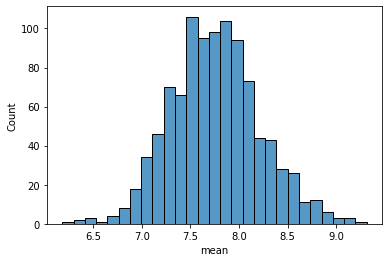

In [13]:
sns.histplot(tsum.loc['mean'])

#### 2.신뢰구간 95%
(1)정규분포를 이용한 신뢰구간

In [14]:
alpha = 0.05 # 신뢰구간 95%
q = -stats.norm.ppf(alpha/2, 0, 1) #z_0.025
q.round(2)

1.96

In [15]:
n = len(jeonju.temp) 
se_x = np.std(jeonju.temp,ddof=1)/np.sqrt(n)
[ np.mean(jeonju.temp) - q * se_x , np.mean(jeonju.temp) + q * se_x]

[6.835030873046618, 8.655291707598542]

(2)모의실험을 이용한 신뢰구간

In [16]:
tsum = jeonju.sample(n, replace=True).describe()
for rep in range(2,1001) :
   tsum=tsum.join(jeonju.sample(n, replace=True).describe(),lsuffix=rep-1, rsuffix=rep)   

In [17]:
tsum.head()

,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9,temp10,temp11,temp12,temp13,temp14,temp15,temp16,temp17,temp18,temp19,temp20,temp21,temp22,temp23,temp24,temp25,temp26,temp27,temp28,temp29,temp30,temp31,temp32,temp33,temp34,temp35,temp36,temp37,temp38,temp39,temp40,...,temp961,temp962,temp963,temp964,temp965,temp966,temp967,temp968,temp969,temp970,temp971,temp972,temp973,temp974,temp975,temp976,temp977,temp978,temp979,temp980,temp981,temp982,temp983,temp984,temp985,temp986,temp987,temp988,temp989,temp990,temp991,temp992,temp993,temp994,temp995,temp996,temp997,temp998,temp999,temp1000
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,8.396774,7.429032,7.983871,7.335484,8.487097,7.425806,7.729032,8.219355,8.106452,8.193548,8.248387,7.535484,7.648387,7.535484,8.100000,7.467742,7.216129,7.858065,8.093548,7.877419,7.567742,6.967742,7.419355,6.716129,7.396774,7.883871,7.751613,7.677419,7.287097,7.919355,7.838710,8.612903,7.658065,7.725806,7.709677,8.012903,7.225806,8.009677,7.806452,7.283871,...,7.919355,7.396774,8.112903,7.496774,7.980645,7.629032,7.493548,8.264516,7.377419,7.122581,7.558065,9.077419,7.709677,7.000000,6.638710,7.470968,7.296774,7.629032,7.832258,7.858065,8.232258,7.945161,7.206452,8.454839,7.625806,7.877419,7.032258,8.174194,8.164516,8.280645,7.403226,7.532258,8.654839,6.780645,8.496774,7.229032,7.038710,7.974194,7.574194,8.129032
std,2.247737,2.027674,2.615734,2.131908,3.114669,1.871357,2.498292,2.957749,3.191231,2.607289,2.307361,2.681113,2.111061,1.912685,3.047841,2.624041,2.107462,2.980579,3.023457,2.249846,2.688666,2.220268,2.646686,1.941837,2.290340,2.269963,2.962867,2.455295,2.030721,2.337865,2.766668,2.809714,1.810299,2.514222,2.564417,2.662673,1.920411,3.168212,2.191033,2.447188,...,2.564946,2.625323,2.333344,1.751853,2.756981,2.739975,2.463864,2.419304,2.360609,2.142850,2.388134,3.229418,2.728779,1.932874,2.052263,2.240416,2.290340,2.100983,3.227836,3.097502,3.147527,2.400394,2.043516,2.927893,2.469544,2.865392,2.521294,2.903787,2.758206,2.405053,2.129551,2.870469,3.116712,2.192627,2.448739,2.420633,2.142378,2.402217,1.941643,3.123480
min,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,...,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.600000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.600000,4.200000,4.200000,4.200000,4.200000,4.200000
25%,7.150000,6.050000,6.100000,6.000000,6.000000,5.900000,5.850000,6.000000,5.350000,6.200000,6.300000,5.350000,6.100000,6.500000,6.150000,5.400000,5.600000,6.000000,5.750000,6.050000,5.400000,4.400000,5.400000,5.350000,5.800000,6.250000,5.350000,5.750000,5.600000,6.300000,5.500000,6.500000,6.150000,5.800000,5.900000,6.250000,6.050000,4.600000,6.400000,5.400000,...,5.600000,5.450000,6.300000,6.150000,5.65

In [18]:
tsum.loc['mean'].describe()

count    1000.000000
mean        7.746665
std         0.451285
min         6.338710
25%         7.429032
50%         7.738710
75%         8.054839
max         9.409677
Name: mean, dtype: float64

In [19]:
q1, q2=np.quantile(tsum.loc['mean'],[alpha/2, 1-alpha/2]).round(3)
[q1, q2]

[6.89, 8.636]

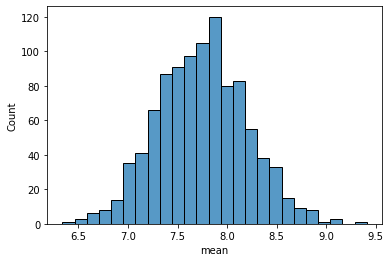

In [20]:
sns.histplot(tsum.loc['mean'])

#### 3.신뢰구간 99%
(1)정규분포를 이용한 신뢰구간

In [21]:
alpha = 0.01 # 신뢰구간 99%
q = -stats.norm.ppf(alpha/2, 0, 1) #z_0.005
q.round(2)

2.58

In [22]:
n = len(jeonju.temp) 
se_x = np.std(jeonju.temp,ddof=1)/np.sqrt(n)
[ np.mean(jeonju.temp) - q * se_x , np.mean(jeonju.temp) + q * se_x]

[6.549047169163991, 8.941275411481168]

(2)모의실험을 이용한 신뢰구간

In [23]:
tsum = jeonju.sample(n, replace=True).describe()
for rep in range(2,1001) :
   tsum=tsum.join(jeonju.sample(n, replace=True).describe(),lsuffix=rep-1, rsuffix=rep)   

In [24]:
tsum.head()

,temp1,temp2,temp3,temp4,temp5,temp6,temp7,temp8,temp9,temp10,temp11,temp12,temp13,temp14,temp15,temp16,temp17,temp18,temp19,temp20,temp21,temp22,temp23,temp24,temp25,temp26,temp27,temp28,temp29,temp30,temp31,temp32,temp33,temp34,temp35,temp36,temp37,temp38,temp39,temp40,...,temp961,temp962,temp963,temp964,temp965,temp966,temp967,temp968,temp969,temp970,temp971,temp972,temp973,temp974,temp975,temp976,temp977,temp978,temp979,temp980,temp981,temp982,temp983,temp984,temp985,temp986,temp987,temp988,temp989,temp990,temp991,temp992,temp993,temp994,temp995,temp996,temp997,temp998,temp999,temp1000
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,...,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,6.419355,7.277419,7.387097,8.616129,7.525806,8.000000,7.748387,7.896774,7.706452,7.487097,7.590323,7.241935,8.161290,7.374194,8.532258,7.509677,6.767742,7.561290,8.219355,7.425806,7.722581,8.196774,7.932258,7.464516,7.641935,6.622581,7.419355,7.683871,7.941935,7.748387,7.154839,8.180645,7.396774,7.903226,7.854839,7.612903,7.896774,7.048387,6.629032,7.932258,...,7.087097,8.096774,7.290323,7.606452,8.100000,8.048387,8.332258,7.300000,7.606452,7.293548,8.109677,7.470968,7.474194,8.025806,7.616129,7.587097,6.912903,7.538710,7.919355,8.664516,7.293548,7.387097,8.029032,8.022581,7.680645,6.941935,8.303226,7.961290,8.106452,8.151613,8.141935,8.603226,6.577419,7.774194,7.441935,7.616129,7.941935,8.219355,7.312903,8.154839
std,2.276169,2.370472,2.606114,2.841490,3.246328,3.143035,2.310393,2.603777,2.537050,2.819544,1.987185,2.199360,2.701935,2.865422,3.055093,1.917873,2.270593,1.974281,3.217599,2.057663,2.397458,2.848682,2.631525,2.436329,2.858178,2.167596,2.579201,2.702850,2.111362,2.604595,2.179425,2.641012,2.563134,2.884844,2.712298,2.182009,2.541716,1.831733,1.850260,2.872674,...,1.911150,3.204630,2.493639,2.521763,2.467657,2.259184,2.557914,2.190282,2.581981,2.888245,2.306708,2.637447,3.023681,1.924745,2.682672,3.158664,1.974798,2.918296,2.753231,2.421783,2.730438,2.055844,2.979731,2.092958,2.762296,2.056498,2.922497,3.219697,2.980820,2.435415,2.831934,2.853709,1.453894,2.636913,2.517641,2.454397,3.162781,2.379695,2.106615,2.438147
min,4.200000,4.200000,4.200000,4.600000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.600000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,...,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000,4.600000,4.200000,4.200000,4.200000,4.200000,4.200000,4.200000
25%,4.200000,5.500000,5.500000,6.300000,4.600000,5.750000,5.950000,6.000000,6.250000,5.500000,6.100000,6.000000,6.400000,5.400000,5.800000,5.950000,5.100000,5.950000,6.050000,6.300000,6.400000,6.000000,6.200000,6.150000,5.600000,4.950000,5.300000,5.900000,6.250000,6.000000,5.500000,6.100000,5.500000,5.900000,5.950000,6.350000,6.350000,5.600000,5.500000,6.000000,...,6.000000,5.900000,5.950000,5.900000,6.10

In [25]:
tsum.loc['mean'].describe()

count    1000.000000
mean        7.755913
std         0.447935
min         6.419355
25%         7.448387
50%         7.748387
75%         8.048387
max         9.387097
Name: mean, dtype: float64

In [26]:
q1, q2=np.quantile(tsum.loc['mean'],[alpha/2, 1-alpha/2]).round(3)
[q1, q2]

[6.629, 8.965]

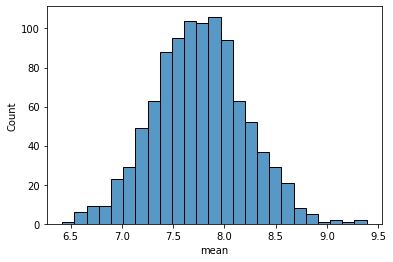

In [27]:
sns.histplot(tsum.loc['mean'])

#### 문제6
2019년 3월의 우리나라 평균기온은 약 7도이다. 다음은 2019년 3월의 전주시 일별 최고기온 데이터이다. 이 데이터를 이용하여 3월의 우리나라 평균기온과 전주시의 평균기온이 같다고 할 수 있는지를 유의수준 5%에서 검증해보아라.

5.6, 8.2, 9.5, 8.3, 8.2, 9.4, 6.0, 5.9, 9.0, 8.7,
6.1, 5.3, 4.2, 6.4, 6.9, 6.3, 7.1, 7.7, 10.8, 13.6,
7.7, 4.6, 4.2, 4.2, 8.1, 11.1, 14.4, 10.3, 10.3, 6.6,
5.4


In [28]:
jeonju = pd.DataFrame({'temp':[5.6, 8.2, 9.5, 8.3, 8.2, 9.4, 6.0, 5.9, 9.0, 8.7,
6.1, 5.3, 4.2, 6.4, 6.9, 6.3, 7.1, 7.7, 10.8, 13.6,
7.7, 4.6, 4.2, 4.2, 8.1, 11.1, 14.4, 10.3, 10.3, 6.6,
5.4]})

In [29]:
np.mean(jeonju.temp) #xbar

7.74516129032258

In [30]:
np.std(jeonju.temp,ddof=1) #s

2.585451438295631

In [31]:
len(jeonju.temp) #n

31

In [32]:
xbar=7.74516129032258; s=2.585451438295631; n=31; mu0=7;
se=s/np.sqrt(n)
zvalue=(xbar-mu0)/se
print(se)
print(zvalue)

0.4643607864506464
1.6047033084301523


In [33]:
1-stats.norm(0,1).cdf(zvalue)   # pvalue

0.05427955675423346

[단측검정]

H0 : μ = 7

H1 : μ > 7

유의확률(p-value, p-값)이 0.05427로 0.05보다 크므로 귀무가설을 기각할 수 없다.

[양측검정]

H0 : μ = 7

H1 : μ ≠ 7

유의확률(p-value, p-값)이 0.05427로 0.05/2보다 크므로 귀무가설을 기각할 수 없다.

### Project 데이터 2

>king_chosun.csv : 조선시대 왕들에 대한 데이터 변수 : ID(일련번호), Name(왕명), Start(즉위년도), End(퇴위년도), Start_Age(즉위 나이), Period(즉위 기간), Wife(부인의 수), Son(아들의 수), Daughter(딸의 수), Birth(출생년도), Death(사망년도), Lifespan(수명)

- 1. Start_Age(즉위 나이), Period(즉위 기간), Son(아들의 수), Daughter(딸의 수), Lifespan(수명) 등의 변수에 대한 탐색

- 2. 즉위순서와 왕들의 수명의 관계는? 수명이 늘어나는가? 그렇지 않은가?

- 3. 아들과 딸의 분포는 비슷한가?

- 4. 즉위 기간, 수명 등에 대한 추정

- 5. 즉위 기간, 수명 등에 대한 검정

In [34]:
king = pd.read_csv('/content/drive/MyDrive/IntroBD/data/king_chosun.csv', encoding ='cp949')

In [35]:
king

,ID,Name,Start,End,Start_Age,Period,Wife,Son,Daughter,Birth,Death,Lifespan
0,1,태조,1392,1398,57,7,6,8,5,1335,1408,73
1,2,정종,1398,1400,42,2,10,17,8,1357,1419,62
2,3,태종,1401,1418,34,18,10,12,17,1367,1422,55
3,4,세종,1418,1450,22,32,6,18,4,1397,1450,53
4,5,문종,1450,1452,37,2,3,1,2,1414,1452,38
5,6,단종,1452,1455,12,3,1,0,0,1441,1457,16
6,7,세조,1455,1468,39,13,2,4,1,1417,1468,51
7,8,예종,1468,1469,19,1,2,2,1,1450,1469,19
8,9,성종,1470,1494,13,23,12,16,12,1457,1494,37
9,10,연산군,1494,1506,19,11,4,4,2,1476,1506,30


#### 1. Start_Age(즉위 나이), Period(즉위 기간), Son(아들의 수), Daughter(딸의 수), Lifespan(수명) 등의 변수에 대한 탐색

>`(=>모두 수치형변수)`

- Start_Age(즉위 나이)

In [36]:
king['Start_Age'].describe()

count    27.000000
mean     24.666667
std      11.845155
min       7.000000
25%      15.000000
50%      22.000000
75%      33.000000
max      57.000000
Name: Start_Age, dtype: float64

>평균 : 24.6

>표준편차 : 11.8

>중위수 : 22

>사분위수 범위(IQR) : 18

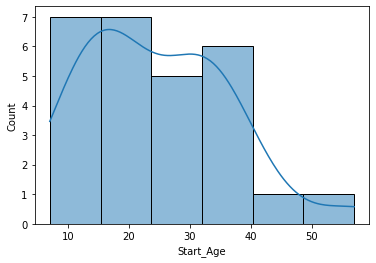

In [37]:
sns.histplot(x = 'Start_Age' , data = king, kde=True)

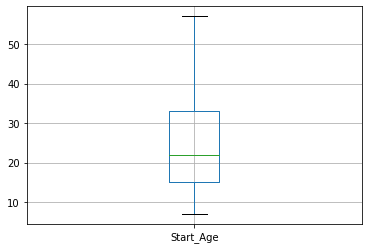

In [38]:
king.boxplot('Start_Age')

즉위 나이는 15~33세 사이가 주 분포를 이루고, 그 이후로 급격히 줄어든다.

- Period(즉위 기간)

In [39]:
king['Period'].describe()

count    27.000000
mean     19.185185
std      15.414871
min       1.000000
25%       5.500000
50%      15.000000
75%      29.500000
max      52.000000
Name: Period, dtype: float64

>평균 : 19.1

>표준편차 : 15.4

>중위수 : 15

>사분위수 범위(IQR) : 24

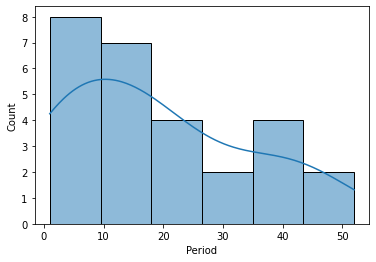

In [40]:
sns.histplot(x = 'Period' , data = king, kde=True)

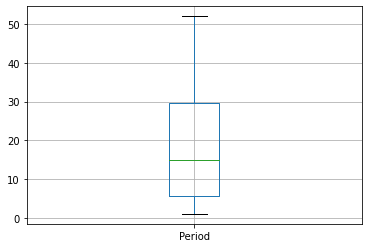

In [41]:
king.boxplot('Period')

즉위 기간은 5~29년이 주 분포를 이뤘고, 영조때는 최고 52년까지 통치가 이뤄졌다.

- Son(아들의 수)

In [42]:
king['Son'].describe()

count    27.000000
mean      5.074074
std       5.690248
min       0.000000
25%       1.000000
50%       2.000000
75%       7.000000
max      18.000000
Name: Son, dtype: float64

>평균 : 5

>표준편차 : 5.6

>중위수 : 2

>사분위수 범위(IQR) : 6

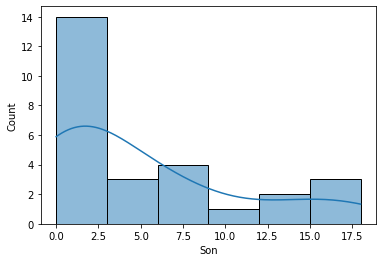

In [43]:
sns.histplot(x = 'Son' , data = king, kde=True)

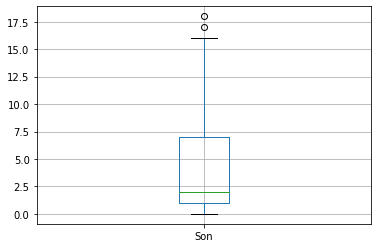

In [44]:
king.boxplot('Son')

아들의 수는 1~7명이 주 분포를 이루는데, 그 중 3명 이하가 분포의 대부분을 차지했다. 

최대로는 18명까지의 기록이 있었고, 17,18명은 이상치로 기록될 만큼 흔치않은 경우였다.

- Daughter(딸의 수)

In [45]:
king['Daughter'].describe()

count    27.000000
mean      4.074074
std       4.656888
min       0.000000
25%       1.000000
50%       2.000000
75%       6.000000
max      17.000000
Name: Daughter, dtype: float64

>평균 : 4

>표준편차 : 4.6

>중위수 : 2

>사분위수 범위(IQR) : 5

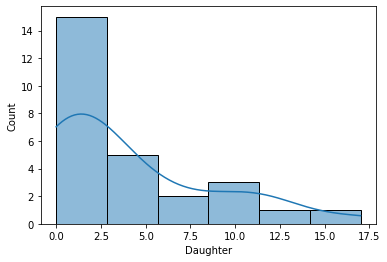

In [46]:
sns.histplot(x = 'Daughter' , data = king, kde=True)

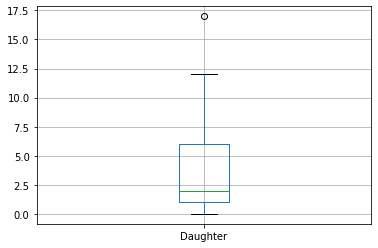

In [47]:
king.boxplot('Daughter')

딸의 수는 1~6명이 주 분포를 이루는데, 아들의 수와 마찬가지로 그 중 3명 이하가 분포의 대부분을 차지했다. 

최대로는 17명까지의 기록이 있었고 이는 이상치로 기록될 만큼 흔치않은 경우였다.

- Lifespan(수명)

In [48]:
king['Lifespan'].describe()

count    27.000000
mean     46.074074
std      16.739924
min      16.000000
25%      33.000000
50%      48.000000
75%      56.000000
max      82.000000
Name: Lifespan, dtype: float64

>평균 : 46

>표준편차 : 16

>중위수 : 48

>사분위수 범위(IQR) : 23

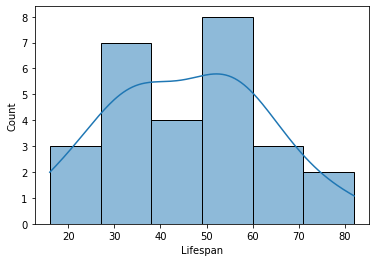

In [49]:
sns.histplot(x = 'Lifespan' , data = king, kde=True)

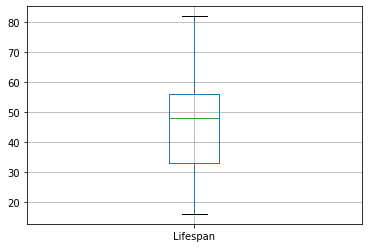

In [50]:
king.boxplot('Lifespan')

수명은 33~56년이 주 분포를 이뤘다. 영조는 특히 82세까지 살며, 조선 왕들 중 유일하게 80살을 넘긴 왕으로 기록됐다.

#### 2. 즉위순서와 왕들의 수명의 관계는? 수명이 늘어나는가? 그렇지 않은가?

상관계수

In [51]:
ds = king.loc[:,['ID','Lifespan']]
ds.corr(method='pearson')

,ID,Lifespan
ID,1.000000,0.002316
Lifespan,0.002316,1.000000


추세선 포함 산점도

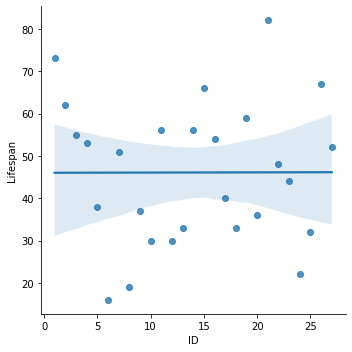

In [52]:
sns.lmplot(x='ID',y='Lifespan',data=king)

두 변수 간의 상관관계는 전혀 없는 듯 하다.

#### 3. 아들과 딸의 분포는 비슷한가?

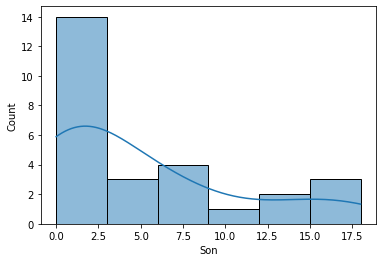

In [53]:
sns.histplot(x = 'Son' , data = king, kde=True)

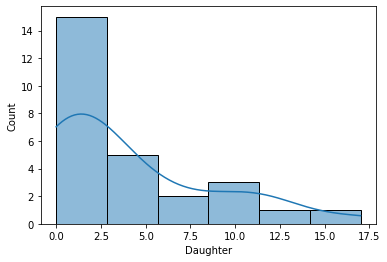

In [54]:
sns.histplot(x = 'Daughter' , data = king, kde=True)

두 변수 간의 히스토그램 모양이 매우 비슷한 것을 보아 분포가 비슷하다.

4. 즉위 기간, 수명 등에 대한 추정

5. 즉위 기간, 수명 등에 대한 검정

**> 왕들이 아들을 낳을 확률에 대한 추정 및 검정 : 왕들이 아들을 낳을 확률은 0.5이다**

[단측검정]

H0 : p=0.5

H1 : p<0.5

유의수준 = 0.05

In [77]:
np.sum(king.Son) #ns

137

In [78]:
np.sum(king.Daughter) #n = 137+110 = 247

110

In [85]:
ns=137; n=247; p0=0.5;
se=np.sqrt(p0*(1-p0)/n); phat=ns/n 
zvalue=(phat-p0)/se
print(zvalue)

1.7179688600346006


In [83]:
1-stats.norm(0,1).cdf(zvalue) #pvalue

0.042901147678271356

유의확률 값이 0.0429로 0.05보다 작으므로 귀무가설 H0를 기각한다.

[양측검정]

H0 : p=0.5

H1 : p≠0.5

유의수준 = 0.05

유의확률 값이 0.0429로 0.05/2보다 크므로 귀무가설 H0를 기각할 수 없다.

**> 조선 왕들의 수명에 대한 추정 및 검정: 고려 왕들의 평균 수명은 42세일때, 조선 왕들의 평균 수명도 이와 같은가?**

[단측검정]

H0 : μ = 42

H1 : μ < 42

유의수준 = 0.05

In [59]:
np.mean(king.Lifespan) #xbar

46.074074074074076

In [60]:
np.std(king.Lifespan,ddof=1) #s

16.73992446891775

In [84]:
xbar=46.074074074074076; s=16.73992446891775; n=27; mu0=42;
se=s/np.sqrt(n)
zvalue=(xbar-mu0)/se
print(zvalue)

1.2646120303346216


In [62]:
1-stats.norm(0,1).cdf(zvalue)   # pvalue

0.10300521919130168

유의확률 값이 0.103로 0.05보다 크므로 귀무가설 H0를 기각할 수 없다.

[양측검정]

H0 : μ = 42

H1 : μ ≠ 42

유의수준 = 0.05

유의확률 값이 0.103로 0.05/2보다 크므로 귀무가설 H0를 기각할 수 없다.